In [87]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon, box
import geopandas as gpd

In [88]:
df = pd.read_csv('0102522-200613084148143.csv', sep='\t', low_memory=False)

In [89]:
df.dtypes

gbifID                                int64
datasetKey                           object
occurrenceID                         object
kingdom                              object
phylum                               object
class                                object
order                                object
family                               object
genus                                object
species                              object
infraspecificEpithet                 object
taxonRank                            object
scientificName                       object
verbatimScientificName               object
verbatimScientificNameAuthorship     object
countryCode                          object
locality                             object
stateProvince                        object
occurrenceStatus                     object
individualCount                     float64
publishingOrgKey                     object
decimalLatitude                     float64
decimalLongitude                

In [90]:
df.head(5)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,2960259947,7d17a2b2-8751-41b5-ac9b-48effc1ea236,1219576,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Centaurea,Centaurea cyanus,...,NaN,NaN,https://creativecommons.org/licenses/by-nc/4.0...,BRERC,Recorder details held at BRERC,NaN,NaN,2020-11-05T10:32:19.552Z,NaN,INDIVIDUAL_COUNT_INVALID
1,2960220000,7d17a2b2-8751-41b5-ac9b-48effc1ea236,2016964,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Centaurea,Centaurea cyanus,...,NaN,NaN,https://creativecommons.org/licenses/by-nc/4.0...,BRERC,Recorder details held at BRERC,NaN,NaN,2020-11-05T10:36:43.806Z,NaN,INDIVIDUAL_COUNT_INVALID
2,2960151105,7d17a2b2-8751-41b5-ac9b-48effc1ea236,367910,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Centaurea,Centaurea cyanus,...,NaN,NaN,https://creativecommons.org/licenses/by-nc/4.0...,BRERC,Recorder details held at BRERC,NaN,NaN,2020-11-05T10:31:33.200Z,NaN,INDIVIDUAL_COUNT_INVALID
3,2959970266,7d17a2b2-8751-41b5-ac9b-48effc1ea236,862508,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Centaurea,Centaurea cyanus,...,NaN,NaN,https://creativecommons.org/licenses/by-nc/4.0...,BRERC,Recorder details held at BRERC,NaN,NaN,2020-11-05T10:30:13.936Z,NaN,INDIVIDUAL_COUNT_INVALID
4,2959950348,7d17a2b2-8751-41b5-ac9b-48effc1ea236,520890,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Centaurea,Centaurea cyanus,...,NaN,NaN,https://creativecommons.org/licenses/by-nc/4.0...,BRERC,Recorder details held at BRERC,NaN,NaN,2020-11-05T10:35:46.719Z,NaN,INDIVIDUAL_COUNT_INVALID


In [91]:
cols = ['species',
        'datasetKey',
        'license',
        'countryCode',
        'decimalLatitude',
        'decimalLongitude']

df = df[cols]

df.sample(5)

,species,datasetKey,license,countryCode,decimalLatitude,decimalLongitude
94866,Centaurea cyanus,95aef98e-f762-11e1-a439-00145eb45e9a,CC_BY_4_0,US,1.000000,0.00000
58892,Centaurea cyanus,d29d79fd-2dc4-4ef5-89b8-cdf66994de0d,CC_BY_4_0,NO,63.308500,10.16730
18247,Centaurea cyanus,e6fab7b3-c733-40b9-8df3-2a03e49532c1,CC_BY_NC_4_0,DE,50.174947,12.12490
31115,Centaurea cyanus,c0dd99c3-fa06-499c-949e-aa44d42f2f16,CC_BY_NC_4_0,FR,45.732350,3.70728
15660,Centaurea cyanus,4ebe5835-851f-43fd-beed-afade357bfc7,CC_BY_NC_4_0,FR,44.890790,5.72373


In [92]:
def make_geom(row):
    try:
        return Point(row['decimalLongitude'], row['decimalLatitude'])
    except Exception as ex:
        return np.nan

df['geometry'] = df.apply(make_geom, axis=1)

In [93]:
display(len(df))
df = df.dropna(subset=['geometry'])
display(len(df))

96653

96653

In [94]:
import geopandas as gpd

blue_df = gpd.GeoDataFrame(df, geometry='geometry', crs=4326)

In [41]:
import geoplot as gplt

In [42]:
import geoplot.crs as gcrs

<AxesSubplot:>

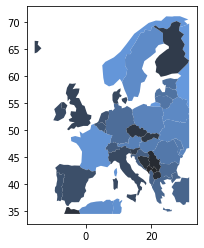

In [95]:
import seaborn as sns

cm_bl1 = sns.dark_palette("#69d", reverse=True, as_cmap=True)
cm_bl2 = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

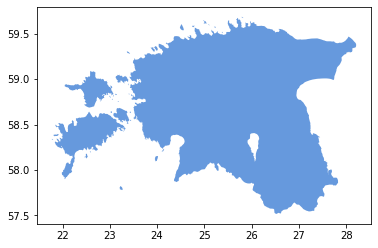

In [96]:
est = gpd.read_file(r"C:\dev\05_geodata\dem\countries\estonia_without_lakes.shp")
display(est.crs)
est.plot(cmap=cm_bl1)

In [59]:
est_mask = blue_df.within(est.loc[0, 'geometry'])

blue_clip2 = blue_df.loc[est_mask]

display(len(blue_clip2))

242

C:\dev\conda3\envs\geopy2020\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\dev\conda3\envs\geopy2020\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

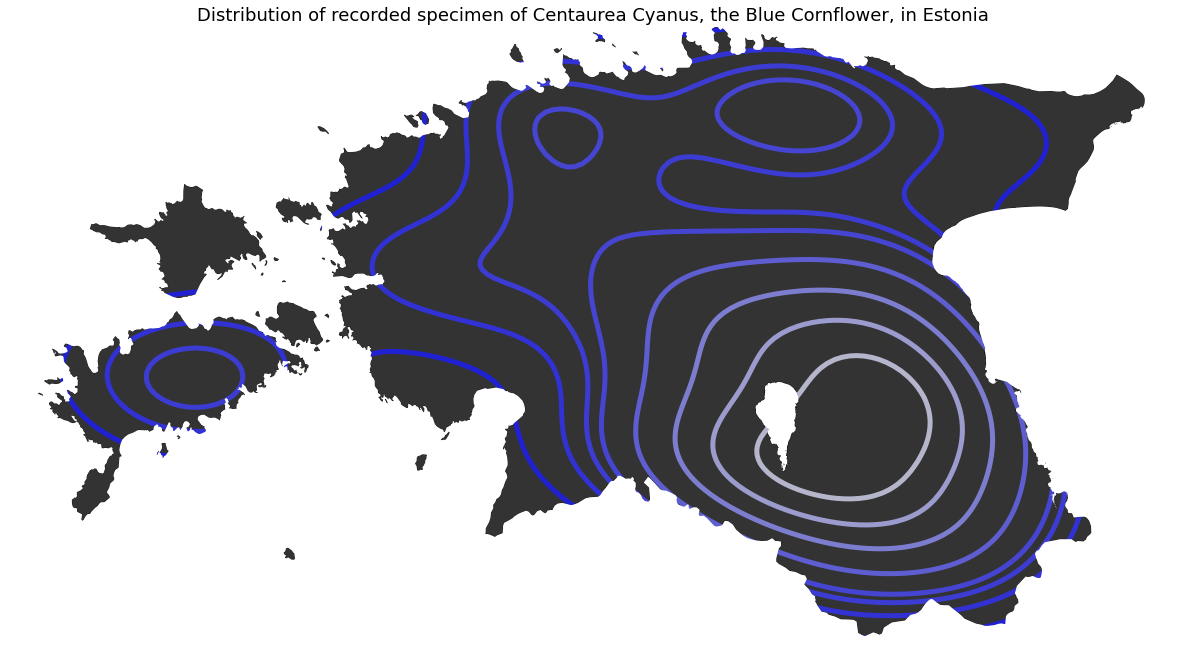

In [97]:
proj = gcrs.AlbersEqualArea()

fig = plt.figure()

cm_bl3 = sns.color_palette("light:b_r", as_cmap=True)

ax = gplt.polyplot(
    est, projection=proj,
    facecolor='black', edgecolor='black', lw=0.7, alpha=0.8, figsize=(21,17))

gplt.kdeplot(blue_clip2, cmap=cm_bl3, shade=False, shade_lowest=True, clip=est, ax=ax, alpha=0.8, linewidths=5)

ax.set_title("Distribution of recorded specimen of Centaurea Cyanus, the Blue Cornflower, in Estonia", fontsize=18)

plt.savefig("day-05-blue.png", bbox_inches='tight')